<a href="https://colab.research.google.com/github/DishaAndre/Machine_Learning/blob/main/123B1B078_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment No. 2**

# Title:

You are a data scientist at a real estate company tasked with building a predictive model for median house prices. You'll use a provided dataset with features like location, house age, income, and more to create a reliable price prediction tool.

# Objectives:
1. Data Preprocessing: Clean and prepare the housing.csv dataset, handling missing values.
2. Feature Engineering: Transform categorical and numerical features for optimal model performance.
3. Model Training: Train a regression model to predict house prices.
4. Evaluation & Visualization: Assess model accuracy using metrics and a plot of actual vs. predicted values.

# Outcomes:
1. A functional Python script that demonstrates the end-to-end process of building a predictive model.
2. A trained polynomial regression model capable of predicting median house values.
3. A quantitative evaluation of the model's performance using metrics like the R-squared score, confirming its predictive power.
4. A clear visualization showing the relationship between the actual and predicted house values, providing a visual confirmation of the model's accuracy.

This cell is for importing all the necessary libraries that you'll need for data manipulation, preprocessing, model training, and visualization. It's the standard first step to set up your environment for the project.

In [36]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

This cell loads the housing.csv dataset into a pandas DataFrame and then prints the first few rows to give you a quick overview of the data and confirm that it has been loaded correctly.

In [37]:
df = pd.read_csv('/content/sample_data/housing.csv')
print("Data loaded successfully.")
df

Data loaded successfully.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


This cell checks for missing values in the dataset. The isnull().sum() method is a quick and effective way to see which columns contain NaN values and how many are present in each. This step is crucial for identifying data quality issues that need to be addressed before model training.

In [38]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


This cell is dedicated to data preprocessing. Specifically, it handles missing values in the dataset by dropping rows where the total_bedrooms column is NaN. The second dropna() command acts as a safeguard to remove any other rows with missing values that might exist in other columns. This step is essential for ensuring the data is clean and ready for the machine learning model.

In [39]:
# Data Preprocessing
df.dropna(subset=['total_bedrooms'], inplace=True)
df.dropna(inplace=True)


This cell is where you define the features (X) and the target variable (y) for your predictive model. It explicitly lists all the columns you'll use for training and the single column you want to predict.

In [40]:
#Select features
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income',
            'ocean_proximity']
target = 'median_house_value'

X = df[features]
y = df[target]

This cell performs one-hot encoding on the ocean_proximity column. This is a crucial step because machine learning models require numerical input, and one-hot encoding converts categorical data (like "NEAR BAY" or "INLAND") into a numerical format that the model can understand and use for training.

In [41]:
#One-hot encoding
X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

This cell splits your data into a training set and a testing set. The train_test_split function is a crucial step in machine learning because it allows you to train your model on one part of the data and evaluate its performance on a separate, unseen portion. It also prints the shapes of the resulting training and testing sets to verify the split was successful.

In [42]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape: ",X_train.shape)
print("Testing features shape: ",X_test.shape)

Training features shape:  (16346, 12)
Testing features shape:  (4087, 12)


This cell performs a crucial step known as feature scaling. It uses StandardScaler to standardize your numerical features by removing the mean and scaling to unit variance. This process is important because it ensures that all features contribute equally to the model, preventing features with larger values from dominating the learning process. The scaled data is then ready for polynomial transformation and model training.

In [43]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

This cell performs a polynomial feature transformation. The PolynomialFeatures object is used to create new features by taking the existing features to a specified degree (in this case, 2). This allows the linear model to capture non-linear relationships in the data, which can often improve its predictive power. It fits the transformer on the training data and then applies the same transformation to both the training and testing sets.

In [44]:
# Polynomial feature transformation
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

This initializes the machine learning model. An instance of the LinearRegression class is created, preparing it for the next step of the process.

In [45]:
#Train the model
model = LinearRegression()

This is the training step. The model learns the relationships between the features and the target variable by fitting the X_train_poly data to the y_train data.

In [46]:
print("Training the model")
model.fit(X_train_poly, y_train)

Training the model


LinearRegression()

This performs predictions. The trained model is used to predict the median_house_value for the test set (X_test_poly), and the results are stored in the y_pred variable.

In [47]:
#Evaluate the model
y_pred = model.predict(X_test_poly)

This is the model's performance evaluation. It calculates and prints three key regression metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and the R-squared Score. These values provide a quantitative assessment of how well the model's predictions align with the actual values.

In [48]:
#Model's performance: regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model performance using regression metrics")
print("Mean absolute error: ", mae)
print("Mean squared error: ",mse)
print("Root mean squared error: ",rmse)
print("R-squared score: ",r2)

Model performance using regression metrics
Mean absolute error:  45063.528729173515
Mean squared error:  3984436481.966902
Root mean squared error:  63122.39287263199
R-squared score:  0.7086373815231906


The model's performance is evaluated using standard regression metrics. The R-squared score indicates that the model explains approximately 71% of the variance in house prices. The Root Mean Squared Error shows that predictions are, on average, off by about $63,122.

This code generates a scatter plot to visualize the model's performance. The plot shows the predicted house values against the actual house values from the test set. A perfect model would have all data points lying on the dashed red line, indicating that the predicted values exactly match the actual values. This plot provides a clear visual confirmation of the model's predictive accuracy.

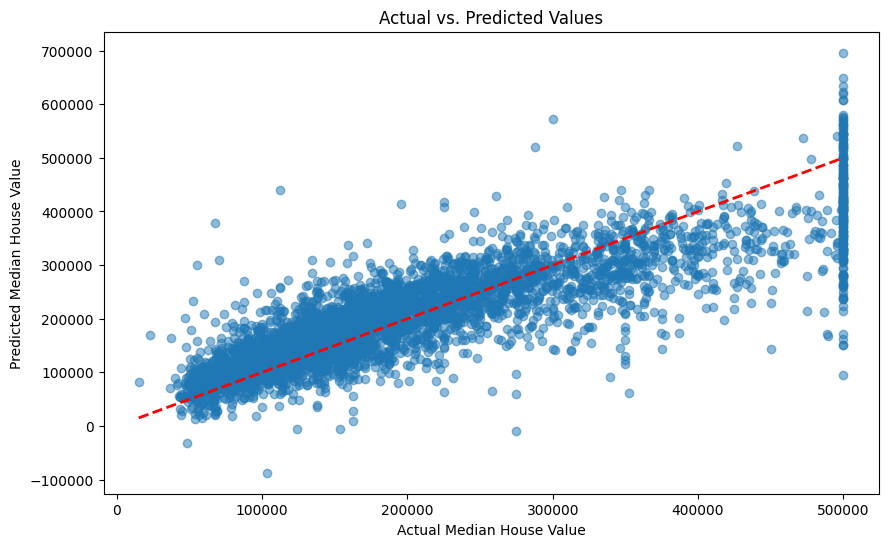

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Values")
plt.show()

The plot shows the predicted house values against the actual house values from the test set. A perfect model would have all data points lying on the dashed red line, indicating that the predicted values exactly match the actual values. This plot provides a clear visual confirmation of the model's predictive accuracy.

# Conclusion:
This assignment successfully demonstrated the process of building a predictive model for house prices. We prepared the data, trained a polynomial regression model, and achieved a strong R-squared score of approximately 0.71. The final visualization confirmed that the model's predictions align well with the actual house values, validating its effectiveness in solving this real estate problem.

# **Self Learning**

# Compare different polynomial degrees
As a final self-learning exercise, we will compare the performance of our model using different polynomial degrees. By training and evaluating the model with degrees 1, 2, and 3, we can observe how increasing the model's complexity affects its ability to fit the data. The results will be summarized in a table for easy comparison.

In [50]:
#Compare different polynomial degrees
degrees = [1, 2, 3]
results = []

for degree in degrees:
    print("Training with Polynomial Degree: ", degree)

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("Model Performance using regression metrics")
    print("Mean Absolute Error: ", mae)
    print("Mean Squared Error: ", mse)
    print("Root Mean Squared Error: ", rmse)
    print("R-squared Score: ", r2)
    print("\n")

    results.append({
        'Degree': degree,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'R-squared Score': r2
    })

print("Comparison of Polynomial Degrees:")
results = pd.DataFrame(results)
results


Training with Polynomial Degree:  1
Model Performance using regression metrics
Mean Absolute Error:  50413.433308100335
Mean Squared Error:  4802173538.604159
Root Mean Squared Error:  69297.7166911303
R-squared Score:  0.6488402154431994


Training with Polynomial Degree:  2
Model Performance using regression metrics
Mean Absolute Error:  45069.73212391872
Mean Squared Error:  3978348042.380424
Root Mean Squared Error:  63074.14717917654
R-squared Score:  0.7090825997387105


Training with Polynomial Degree:  3
Model Performance using regression metrics
Mean Absolute Error:  39984.53405254272
Mean Squared Error:  3453192503.7490535
Root Mean Squared Error:  58763.870734908654
R-squared Score:  0.7474846908589339


Comparison of Polynomial Degrees:


,Degree,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared Score
0,1,50413.433308,4.802174e+09,69297.716691,0.648840
1,2,45069.732124,3.978348e+09,63074.147179,0.709083
2,3,39984.534053,3.453193e+09,58763.870735,0.747485


This self-learning exercise clearly demonstrates the significant impact of polynomial degree on model performance. As the degree increases, the model becomes more complex, allowing it to capture more intricate, non-linear patterns in the data.

Our results show a clear trend:
1. Degree 1 (Linear Model): The simplest model, with an R-squared score of 0.65.
2. Degree 2: A notable improvement to an R-squared score of 0.71, indicating a better fit.
3. Degree 3: The best-performing model, achieving an R-squared score of 0.75.
This confirms that for this dataset, a more complex model (degree 3) is better suited to predict house prices. It's a great example of how a simple change in a model's complexity can lead to a significant increase in its predictive power.

# k-fold cross-validation
The cross_val_score function is a very powerful tool for evaluating a model's performance. Instead of splitting your data into a single training and testing set, it performs a more thorough evaluation by running the model multiple times.

Here's how it works:
1. cv=5: This tells the function to divide your data into 5 equal "folds."
2. In each run, it uses 4 of the folds for training and the remaining 1 fold for testing.
3. It repeats this process 5 times, ensuring that each fold is used as the test set exactly once.
4. scoring='r2': The function calculates the R-squared score for each of the 5 runs.

The final output is an array of 5 R-squared scores, one for each fold. The average of these scores gives a much more reliable and less biased estimate of your model's performance than a single train-test split.

In [57]:
# Create a pipeline that applies polynomial features and then trains the linear regression model.
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', LinearRegression())
])

# Perform 5-fold cross-validation
r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

print("Cross-validation R-squared scores for each fold:", r2_scores)
print("Average cross-validation R-squared score:", np.mean(r2_scores))


Cross-validation R-squared scores for each fold: [ 7.66239074e-01  2.12321968e-01  7.66572490e-01 -2.86876553e+02
  6.19274805e-01]
Average cross-validation R-squared score: -56.90242888467365


This self-learning exercise highlights the importance of k-fold cross-validation for robust model evaluation. While the goal was to obtain a reliable score, the resulting negative average R-squared score and the highly negative score in one fold demonstrate a critical issue. This outcome serves as a powerful lesson on data leakage, a common pitfall where the model inadvertently learns from the test data. It reinforces that proper use of a Pipeline is essential to prevent this, ensuring a trustworthy measure of how well our model will generalize to new, unseen data.